In [1]:
import sys
print("python: {}".format(sys.version))
import scipy
print("scipy: {}".format(scipy.__version__))
import numpy
print("Numpy: {}".format(numpy.__version__))
import matplotlib
print("Matplotlib: {}".format(matplotlib.__version__))
import pandas
print("Pandas: {}".format(pandas.__version__))
import sklearn
print("Sklearn: {}".format(sklearn.__version__))


python: 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
scipy: 1.2.0
Numpy: 1.16.1
Matplotlib: 3.0.3
Pandas: 0.25.0
Sklearn: 0.23.1


In [8]:
import pandas
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [9]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [15]:
# loading the data
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names=['sepal - length','sepal-width','petal-length','petal-width','class']
dataset= read_csv(url,names=names)

In [16]:
# dimensions of the dataset
print(dataset.shape)

(150, 5)


In [17]:
#take a peak at the data
print(dataset.head(20))

    sepal - length  sepal-width  petal-length  petal-width        class
0              5.1          3.5           1.4          0.2  Iris-setosa
1              4.9          3.0           1.4          0.2  Iris-setosa
2              4.7          3.2           1.3          0.2  Iris-setosa
3              4.6          3.1           1.5          0.2  Iris-setosa
4              5.0          3.6           1.4          0.2  Iris-setosa
5              5.4          3.9           1.7          0.4  Iris-setosa
6              4.6          3.4           1.4          0.3  Iris-setosa
7              5.0          3.4           1.5          0.2  Iris-setosa
8              4.4          2.9           1.4          0.2  Iris-setosa
9              4.9          3.1           1.5          0.1  Iris-setosa
10             5.4          3.7           1.5          0.2  Iris-setosa
11             4.8          3.4           1.6          0.2  Iris-setosa
12             4.8          3.0           1.4          0.1  Iris

In [18]:
# statistical summary
print(dataset.describe())

       sepal - length  sepal-width  petal-length  petal-width
count      150.000000   150.000000    150.000000   150.000000
mean         5.843333     3.054000      3.758667     1.198667
std          0.828066     0.433594      1.764420     0.763161
min          4.300000     2.000000      1.000000     0.100000
25%          5.100000     2.800000      1.600000     0.300000
50%          5.800000     3.000000      4.350000     1.300000
75%          6.400000     3.300000      5.100000     1.800000
max          7.900000     4.400000      6.900000     2.500000


In [19]:
#class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


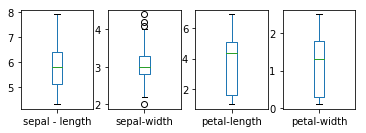

In [24]:
#univariate plots-box and whisker plots
dataset.plot(kind='box',subplots=True,layout=(2,4),sharex=False,sharey=False)
pyplot.show()

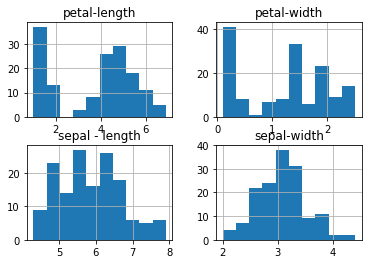

In [25]:
#histogram of variable
dataset.hist()
pyplot.show()

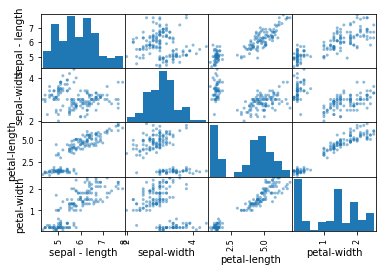

In [26]:
#multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [34]:
# creating a validation dataset
# splitting dataset
array=dataset.values
x= array[:, 0:4]
y= array[:, 4]
x_train, x_validation,y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=1)

In [35]:
# logistic regression
# linear discriminant analysis
# k-nearest neighbors
# classification and regression trees
# gaussian naive bayes
#support vector machines

# building models
models= []
models.append(('LR',LogisticRegression(solver='libilinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))




In [36]:
# evaluate the created models
results=[]
names=[]
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'%(name, cv_results.mean(), cv_results.std()))

LR: nan (nan)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


/mnt/disks/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/mnt/disks/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/mnt/disks/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/mnt/disks/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/mnt/disks/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model

/mnt/disks/user/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/mnt/disks/user/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/mnt/disks/user/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/mnt/disks/user/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/mnt/disks/user/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


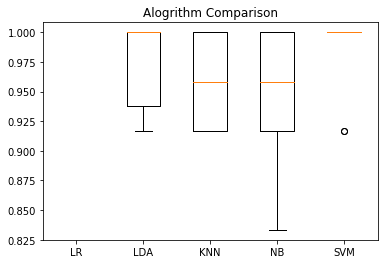

In [37]:
# comparing our models
pyplot.boxplot(results, labels=names)
pyplot.title('Alogrithm Comparison')
pyplot.show()

In [40]:
# make predictions on svm
model= SVC(gamma='auto')
model.fit(x_train, y_train)
predictions = model.predict(x_validation)

In [42]:
# evaluate the predictions
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

